In [1]:
import argparse
import os
import time

import numpy as np
import pandas as pd

import torch
import torchio as tio
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader

from sklearn.model_selection import train_test_split

In [2]:
from dataset import RsnaDataset

In [3]:
from main import get_train_val_loaders

In [4]:
from easydict import EasyDict as edict

args = edict({
    'data_path': '/home/asheesh/Documents/Github/kaggle-rsna-miccai/data/rsna-miccai-brain-tumor-radiogenomic-classification',
    'epochs': 10,
    'batch_size': 4,
    'validation_pct': 0.2,
    'device': torch.device("cuda:0" if torch.cuda.is_available() else "cpu"),
    'data_dir': 'train',
    'sequence_length': 30,
})

In [5]:
transform = tio.Compose((
    tio.CropOrPad((3, 256, 256)),
    tio.RescaleIntensity((0, 1)),
    tio.ZNormalization()
))

In [6]:
train_loader, val_loader = get_train_val_loaders(args, transform=transform)

In [7]:
data = next(iter(train_loader))
x, y = data['X'], data['y']

In [8]:
x.shape

torch.Size([4, 30, 4, 256, 256])

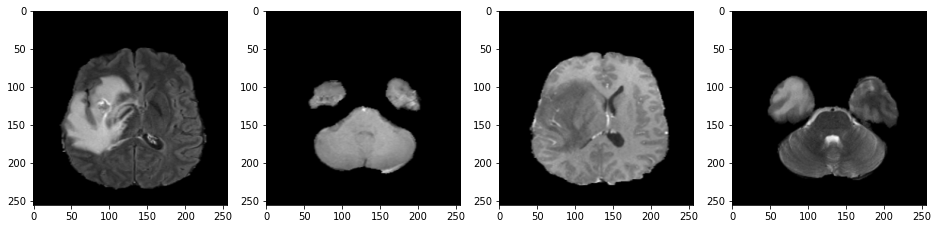

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(x[0][19].numpy()[i], cmap="gray")

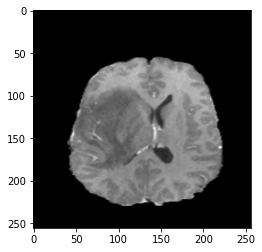

In [18]:
image = x[0][19][2]
plt.imshow(image.numpy(), cmap='gray')

In [19]:
print(image.max())
print(image.min())

tensor(0.9922)
tensor(0.)
